# Changing Colorspaces
 
This week:

• you will learn how to convert images from one color-space to another

• In addition to that, we will create an application which extracts a colored object

• You will learn following functions : cv2.cvtColor(), cv2.inRange() etc.

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which
are most widely used ones, BGR ↔ Gray and BGR ↔ HSV. 

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the
type of conversion.

For BGR → Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR → HSV, we use the flag
cv2.COLOR_BGR2HSV.

**Note:** For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use
different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

This is really interesting article on color models and color spaces.
https://programmingdesignsystems.com/color/color-models-and-color-spaces/index.html

### Object Tracking

Now we know how to convert BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier
to represent a color than RGB color-space. In our application, we will try to extract a blue colored object. So here is
the method:

• Take each frame of the video

• Convert from BGR to HSV color-space

• We threshold the HSV image for a range of blue color

• Now extract the blue object alone, we can do whatever on that image we want.

Below is the code which are commented in detail :

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cap = cv2.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    #OpenCV uses HSV ranges between (0-180, 0-255, 0-255)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

**Note:** There are some noises in the image. We will see how to remove them in later sessions

#### How to find HSV values to track?
It is very simple and you can use the same function,
cv2.cvtColor(). Instead of passing an image, you just pass the BGR values you want. For example, to find the HSV value of blue, try following commands in Python:

In [3]:
blue = np.uint8([[[255,0,0 ]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)
#NOW go check the lower and upper ranges in the previous cell

[[[120 255 255]]]


# Image Thresholding

**Goal**

• In this tutorial, you will learn Simple thresholding, Adaptive thresholding, Otsu’s thresholding etc.

• You will learn these functions : cv2.threshold, cv2.adaptiveThreshold etc.

### Simple Thresholding

Here, the matter is straight forward. 
If pixel value is greater than a threshold value, it is assigned one value (may be
white), else it is assigned another value (may be black). The function used is cv2.threshold. 

First argument is the source image, which should be a grayscale image. 

Second argument is the threshold value which is used to classify
the pixel values. 

Third argument is the maxVal which represents the value to be given if pixel value is more than
(sometimes less than) the threshold value. 

OpenCV provides different styles of thresholding and it is decided by the
fourth parameter of the function. Different types are:

• cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black)

• cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.

• cv.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.

• cv.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.

• cv.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

![](chart.PNG)

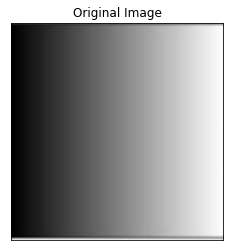

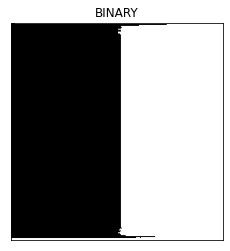

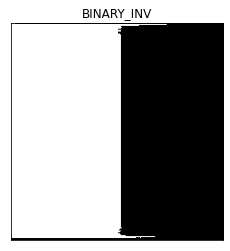

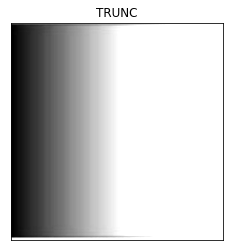

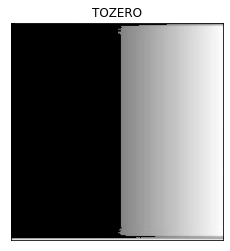

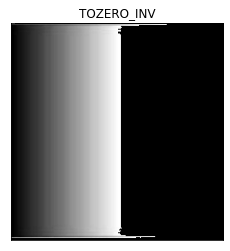

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('gradient.PNG',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    #plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

### Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where
image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. 

In this, the
algorithm calculates the threshold for a small region of the image. So we get different thresholds for different regions
of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

**Adaptive Method -** It decides how thresholding value is calculated.

        • cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
        • cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

**Block Size -** It decides the size of neighbourhood area.


**C -** It is just a constant which is subtracted from the mean or weighted mean calculated.
Below piece of code compares global thresholding and adaptive thresholding for an image with varying illumination:

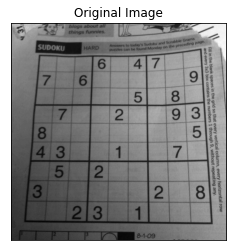

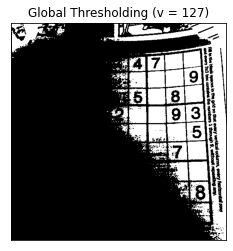

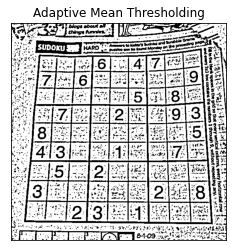

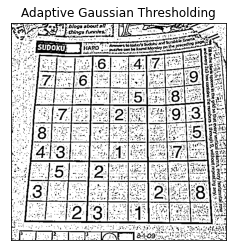

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sudoku.png',0)
# img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    #plt.subplot(2,2,i+1),
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

### Otsu’s Binarization

In the first section, I told you there is a second parameter retVal. Its use comes when we go for Otsu’s Binarization.
So what is it?

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected
is good or not? 

Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is
an image whose histogram has two peaks, basically the pixel intensities are distributed into two dominant regions). For that image, we can approximately take a value in the middle of those
peaks as threshold value, right ? 

That is what Otsu binarization does. So in simple words, it automatically calculates
a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t
be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply
pass zero. 

Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If
Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, I applied global thresholding for a value of 127. 

In second case, I applied Otsu’s thresholding directly. In third case, I filtered image with a 5x5 gaussian kernel
to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.


/home/suraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


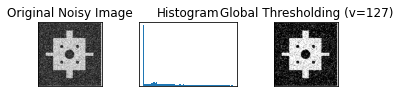

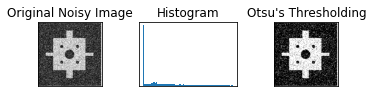

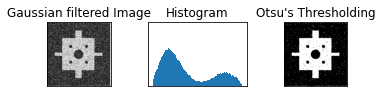

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('noisy2.png',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.subplot(3,3,1)
for i in range(3):
    plt.subplot(3,3,i*3+1)
    plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),
    plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),
    plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),
    plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

#### How Otsu’s Binarization Works?

This section demonstrates a Python implementation of Otsu’s binarization to show how it works actually.

Since we are working with bimodal images, Otsu’s algorithm tries to find a threshold value (t) which minimizes the
weighted within-class variance given by the relation :

![](Otsu.png)

Check out this video to get some clarity regarding the math behind Otsu's method
https://www.youtube.com/watch?v=GuqBJ4W7_58

this ppt is also helpful
https://medium.com/@hbyacademic/otsu-thresholding-4337710dc519

# Geometric Transformations of Images

#### Goals

• Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.

• You will see these functions: cv2.getPerspectiveTransform

### Transformations

OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have
all kinds of transformations. 

cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a
3x3 transformation matrix as input.

### Scaling
Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of
the image can be specified manually, or you can specify the scaling factor. 

Different interpolation methods are
used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) &
cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing
purposes. You can resize an input image either of following methods:

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Messi.jpg')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#OR
height, width = img.shape[:2]
cv2.imshow('img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Translation

Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t x , t y ), you can create
the transformation matrix M as follows:

![](translation.PNG)


You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below
example for a shift of (100,50):

In [4]:
import cv2
import numpy as np
img = cv2.imread('Messi.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Warning:** Third argument of the cv2.warpAffine() function is the size of the output image, which should be in
the form of (width, height). Remember width = number of columns, and height = number of rows.

### Rotation

Rotation of an image for an angle θ is achieved by the transformation matrix of the form

![](rotation.png)

In [4]:
img = cv2.imread('Messi.jpg',0)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the
transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.
Check below example, and also look at the points I selected (which are marked in Green color):

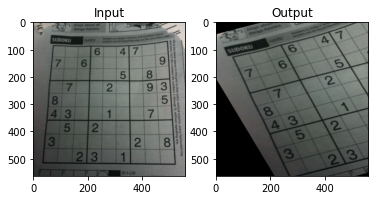

In [12]:
img = cv2.imread('sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after
the transformation. 

To find this transformation matrix, you need 4 points on the input image and corresponding points
on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be
found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation
matrix.

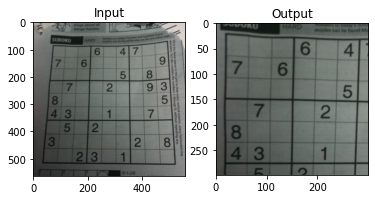

In [3]:
img = cv2.imread('sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()